In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import requests


from torch import nn
from pathlib import Path
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [78]:
X, y = make_circles(n_samples=10000, noise=0.03)
X[:5], y[:5]

(array([[ 0.00947937,  1.0513995 ],
        [-0.87143741, -0.59281864],
        [-0.25911611, -0.81011606],
        [ 0.31181218,  0.76436939],
        [-0.4134529 , -0.69850932]]),
 array([0, 0, 1, 1, 1]))

In [79]:
X_sample = X[0]
y_sample = y[0]
print(f'For sample input: {X_sample} the output is: {y_sample}')

For sample input: [0.00947937 1.0513995 ] the output is: 0


In [80]:
circles = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'label': y
})
circles[:10]

,X1,X2,label
0,0.009479,1.051400,0
1,-0.871437,-0.592819,0
2,-0.259116,-0.810116,1
3,0.311812,0.764369,1
4,-0.413453,-0.698509,1
5,-0.281716,-0.943781,0
6,-0.193984,-0.751465,1
7,-0.464308,0.612745,1
8,-0.585854,0.575213,1
9,0.436372,-0.832277,0


In [81]:
circles.label.value_counts()

label
0    5000
1    5000
Name: count, dtype: int64

In [82]:
len(circles.label)

10000

<Axes: xlabel='X1', ylabel='X2'>

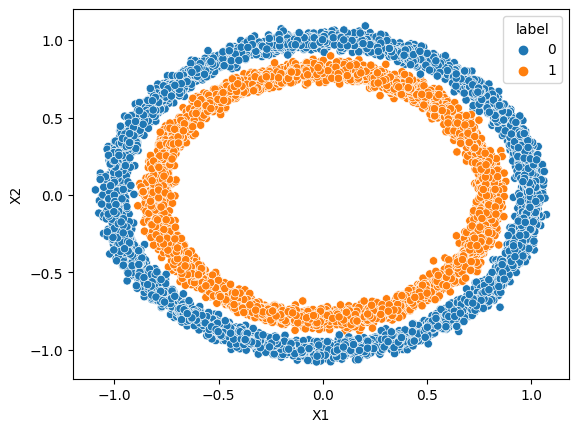

In [83]:
sns.scatterplot(data=circles, x='X1', y='X2', hue='label')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [85]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x)


model = CircleModel()
model

CircleModel(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [86]:
def acc(true, pred):
    correct = torch.eq(true, pred).sum().item()
    acc = (correct / len(pred)) * 100
    return acc

In [87]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [88]:
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    train_logits = model(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    # Calculate the loss and accuracy
    train_loss = criterion(train_logits, y_train)
    train_acc = acc(y_train, train_preds)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Backpropagation
    train_loss.backward()
    # Optimizer step
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        # Calculate the loss and accuracy
        test_loss = criterion(test_logits, y_test)
        test_acc = acc(y_test, test_preds)

        if epoch % 1000 == 0:
            print(f'Epoch: {epoch} | Train Loss: {train_loss:.2f} Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.2f} Test Accuracy: {test_acc:.2f}%')

Epoch: 0 | Train Loss: 0.69 Train Accuracy: 50.31% | Test Loss: 0.70 Test Accuracy: 48.75%
Epoch: 1000 | Train Loss: 0.54 Train Accuracy: 92.92% | Test Loss: 0.54 Test Accuracy: 92.60%
Epoch: 2000 | Train Loss: 0.04 Train Accuracy: 99.54% | Test Loss: 0.04 Test Accuracy: 99.55%
Epoch: 3000 | Train Loss: 0.02 Train Accuracy: 99.66% | Test Loss: 0.02 Test Accuracy: 99.70%
Epoch: 4000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.75%
Epoch: 5000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.75%
Epoch: 6000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.75%
Epoch: 7000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.75%
Epoch: 8000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.75%
Epoch: 9000 | Train Loss: 0.01 Train Accuracy: 99.74% | Test Loss: 0.01 Test Accuracy: 99.80%


In [89]:
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists. Skipping download')
else:
    request = requests.get('https://raw.githubusercontent.com/TheCloudOracle/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

from helper_functions import plot_decision_boundary

helper_functions.py already exists. Skipping download


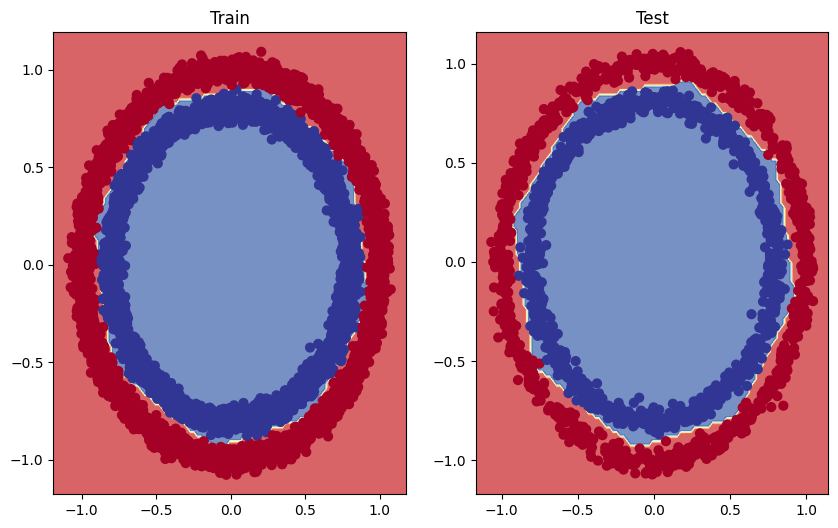

In [90]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)